## Policy Evaluation
Policy evaluation is the computation of the the state-value function $V_{\pi}$ for an arbitrary policy $\pi$. This can also be referred as _policy prediction_. If the model or the dynamics of the environment is fully known, following Bellman equations, we can use Dynamic Programming (DP) to achieve this. <p>


### Model
The model is a descriptor of the environment. With the model, we can learn or infer how the environment would interact with and provide feedback to the agent. The model has two major parts, transition probability function $P$ and reward funtion $R$.

#### Transition Probability
Let’s say when we are in state s, we decide to take action $a$ to arrive in the next state $s^{\prime}$ and obtain reward $r$. This is known as one transition step, represented by a tuple $(s,{\ }a,{\ }s^{\prime},{\ }r)$. We use $\mathbb{P}$ as a symbol of “probability”.<p>
$$P(s^\prime,r,|s,a)={\ }\mathbb{P}{[S_{t+1}=s^{\prime},{\ }R_{t+1}=r|S_{t}=s,{\ }A_t=a]}$$


#### Reward
The reward $R$ function is very critical in reinforcemnt learning. It is an immediate scaler signal the agent receives from the environment for taking an action which is moving from one state to another. It depends on current state of the environment $S_{t}=s$, the action just taken $A_t=a$  and the next state of the environment $S_{t+1}=s^{\prime}$.<p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad   r=R(s, a, s^{\prime})$ or state-action pair $r=R(s, a)$ <p>
The goal of the agent is to maximize the the total amount of reward it receives. This means not maximizing immediate reward but cummulative reward (or future reward) in a long run. This cummulative reward is termed the return $G$.
    $$G_t = R_{t+1}+ \gamma R_{t+2}+ \gamma^2 R_{t+3}+ \dots = \displaystyle\sum_{k=0}^{\infty}\gamma^k R_{t+k+1}$$
 <p> $\gamma \in{(0,1)}$ is the discount factor <p>


#### Policy
The policy $\pi$ is the agent's behavior, it tell us which action to take in any given state $s$. It is the brain of the agent. It is a mapping from state $s$ to action $a$ and can be either deterministic or stochastic:<p>
* Deterministic policy: $\pi(s)=a$ <p>
* Stochastic policy: $\pi(a|s)= \mathbb{P}{[A_t=a | S_t=s]}$ 

### Value Function
Value function is a function that estimates how good or rewarding a state is (or how good a state-action pair is) by a prediction of future reward, and this future reward is the return $G_t$. So, value fanction is the expected return of a state or state-action pair (action taken in a state).<p>
The **state-value** of a state $s$ is the expected return if an agent starts in state $s$ and follow policy $\pi$ thereafter.
$$V_{\pi}(s) = {\mathbb{E}}_{\pi}[G_t|S_t=s] = {\mathbb{E}}_{\pi}\begin{bmatrix}\displaystyle\sum_{k=0}^{\infty}\gamma^k R_{t+k+1}| S_t=s \end{bmatrix}$$ <p>
The **action-value** function (or simply Q-value) of an action $a$ (or state-action pair) is the expected return if an agent starts from state $s$, take an action $a$ and follow policy $\pi$ thereafter. Simply put, it is the value of an action $a$ (arbitrary action which may not have come from the policy) taken in state $s$ and follow the policy $\pi$ thereafter. <p>
$$Q_{\pi}(s,a) = {\mathbb{E}}_{\pi}[G_t|S_t=s, A_t=a] = {\mathbb{E}}_{\pi}\begin{bmatrix}\displaystyle\sum_{k=0}^{\infty}\gamma^k R_{t+k+1}|S_t=s, A_t=a\end{bmatrix} $$ <p>
where $\mathbb{E}_{\pi}[.]$ denotes the expected value of a random variable given that policy $\pi$ is being followed, and $t$ is any timestep. Note that the value of the terminal state, if any, is always zero.
    

Additionally, since we follow the target policy $\pi$, we can make use of the probability distribution over possible actions and the Q-values to recover the state-value: <p>
$$V_{\pi}(s) = \displaystyle\sum_{a \in A}\pi(a|s)Q_{\pi}(s,a)$$

The difference between action-value function and state-value function is the action **advantage** function (“A-value”): <p>
    $$A_{\pi}(s,a)= Q_{\pi}(s,a) - V_{\pi}(s)$$ <p>
The advantage function $A_{\pi}(s,a)$ corresponding to a policy $\pi$ describes how much better it is to take a specific action $a$ in state $s$, over randomly selecting an action according to $\pi(\cdot|s)$, assuming you act according to $\pi$ thereafter. 

### Bellman Equations
Bellman equations refer to a set of equations that decompose the value function into the immediate reward plus the discounted future values<p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad V_{\pi}(s) = {\mathbb{E}}_{\pi}[G_t|S_t=s]$ <p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad = \mathbb{E}_\pi [R_{t+1}+ \gamma R_{t+2}+ \gamma^2 R_{t+3}+ \gamma^3 R_{t+4}+ \dots|S_t=s]$ <p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad= \mathbb{E}_\pi [R_{t+1}+ \gamma (R_{t+2}+ \gamma R_{t+3}+ \gamma^2 R_{t+4}+ \dots)|S_t=s]$ <p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad= \mathbb{E}_\pi [R_{t+1}+ \gamma (G_{t+1})|S_t=s]$ <p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad={\mathbb{E}}_{\pi}\begin{bmatrix}R_{t+1}+ \gamma  \displaystyle\sum_{k=0}^{\infty}\gamma^k R_{t+k+2}|S_t=s\end{bmatrix}$ <p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad=\displaystyle\sum_a {\pi(a|s)}\displaystyle\sum_{s^{\prime}} \displaystyle\sum_r {P(s^\prime,r,|s,a)}\begin{bmatrix} r + \gamma\mathbb{E}_\pi\begin{bmatrix}\displaystyle\sum_{k=0}^\infty \gamma^k R_{t+k+2}|S_t=s \end{bmatrix} \end{bmatrix} $  <p>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad= \displaystyle\sum_a {\pi(a|s)}\displaystyle\sum_{{s^\prime},r} {P(s^\prime,r,|s,a)}\begin{bmatrix} r + \gamma {V_\pi}(s^{\prime})\end{bmatrix}$ <p>
This is the  Bellman expectation equation<p>
$a$: action which is taken from a set of actions available in state $s$ <p>
$s^{\prime}$: next state <p>
$r$: reward for taking action $a$ <p>
<p>
Note how the final expression can be read very easily as an expected value. It is really a sum over all values of the three variables $a$, $s^{\prime}$ and $r$. For each triple, we compute its probability, $\pi(a|s) P(s^\prime,r,|s,a)$, weight the quantity in brackets by that probability then sum over all possibilities to get an expected value.Let's use the below simple backup diagram to illustrate.

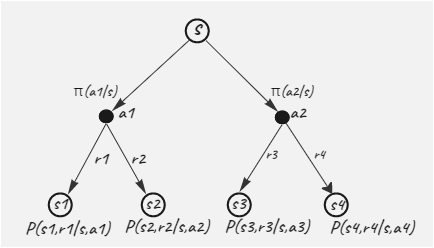

The value of state $s$:
$$V_\pi(s) =\pi(a_1|s)[P(s_1,r_1|s,a_1)(r_1+\gamma{V_\pi}(s_1)+P(s_2,r_2|s,a_1)(r_2+{\gamma}V_\pi(s_2)]+$$
$$\quad\quad\quad\pi(a_2|s)[P(s_3,r_3|s,a_2)(r_3+{\gamma}V_\pi(s_3))+P(s_4,r_4|s,a_2)(r_4+{\gamma}V_\pi{(s_4)}]$$

Let's use the transition graph below to demonstrate how we can estimate the value of the states. The transition graph is a student daily routine.

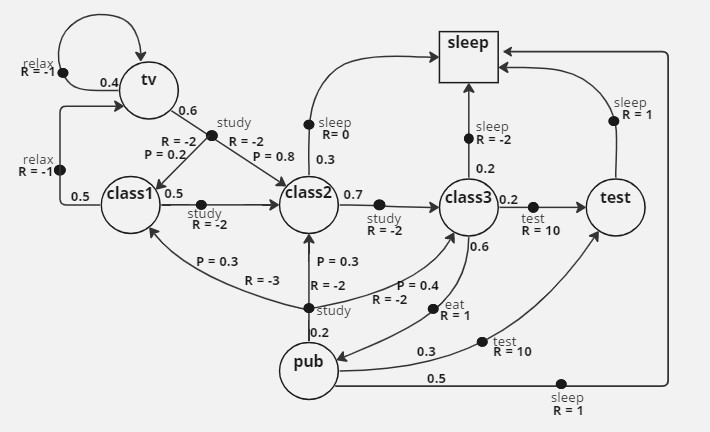

States = {claas1, class2, class3, test, pub, tv, sleep}<p>
Actions = {study, test, eat, relax, sleep}<p>
Actions available in each state:_<p>
Action(class1) = {study,relax}<p>
Action(class2) = {study, sleep}<p>
Action(class3) = {test, eat, sleep}<p>
Action(test):{sleep}<p>
Action(pub) = {study, eat, sleep}<p>
Action(tv) = {study, relax}<p>
Sleep is the terminal state<p>
P: transition probability<p>
R: reward for transitioning from one state to another after taking action<p>
The numbers close to the states are the policies π(a|s)<P>
<p>To compute the value of each state, we run arbitrary number of iterations. In each iteration, we randomly select a state and estimate its value using the Bellman expectation equation. We terminate the iteration when we observe a convergence of the states values.



In [1]:
#Import libraries
import random
import numpy as np

In [2]:
# List of states available in the environment
states = ["class1", "class2", "class3", "tv", "test", "pub", "sleep"]

In [3]:
# In each state (key of the dict-state_features) contain the available action(s) a, policy value π(a|s) (ie probabilty 
# of taking that action in the given state), next state s', transition probability p(s'|s,a) and 
# the reward value r.

state_features = {"class1": [["study", 0.5, "class2", 1, -2], ["relax", 0.5, "tv", 1, -1]], 
        "class2": [["study", 0.7, "class3", 1, -2], ["sleep", 0.3, "sleep", 1, 0]],
        "class3": [["sleep", 0.2, "sleep", 1, 1], ["eat", 0.6, "pub", 1, 1], ["test", 0.2, "test", 1, 10]],
        "tv": [["study", 0.6, "class1", 0.2, -2], ["study", 0.6, "class2", 0.8, -2], ["relax", 0.4, "tv", 1, -1]],
        "test": [["sleep", 1, "sleep", 1, 1]],
        "pub": [["study", 0.2, "class1", 0.3, -3], ["study", 0.2, "class2", 0.3,-2], ["study", 0.2, "class3", 0.4, -2],
                ["test", 0.3, "test", 1, 10], ["sleep", 0.5, "sleep", 1, 1]],
        "sleep": [[]]}

In [4]:
# The respective  initial values of the states
state_values = [0,0,0,0,0,0,0]
gamma = 1.0
for j in range(200):
    state = random.choice(states) #randomly choose a state
    state_init = [0,0,0,0,0,0,0]
    for i in state_features[state]:
        if state != "sleep": # terminal state
            next_state_value = state_values[states.index(i[2])]
            state_update = i[1]*(i[3]*(i[4]+gamma*next_state_value))
            state_init[states.index(state)] += state_update
    state_values[states.index(state)] = state_init[states.index(state)]
    state_init[states.index(state)] = 0
    
    print(f"States: {states}")
    print(f"Selected state: {state}")
    print(f"States value update: {state_values}")
    print()
        
                

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: pub
States value update: [0, 0, 0, 0, 0, 3.04, 0]

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: class2
States value update: [0, -1.4, 0, 0, 0, 3.04, 0]

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: pub
States value update: [0, -1.4, 0, 0, 0, 2.956, 0]

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: pub
States value update: [0, -1.4, 0, 0, 0, 2.956, 0]

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: class1
States value update: [-2.2, -1.4, 0, 0, 0, 2.956, 0]

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: test
States value update: [-2.2, -1.4, 0, 0, 1.0, 2.956, 0]

States: ['class1', 'class2', 'class3', 'tv', 'test', 'pub', 'sleep']
Selected state: test
States value update: [-2.2, -1.4, 0, 0, 1.0, 2.956, 0]

Stat

We had a convergence after 200 iterations, these become the values of the states.

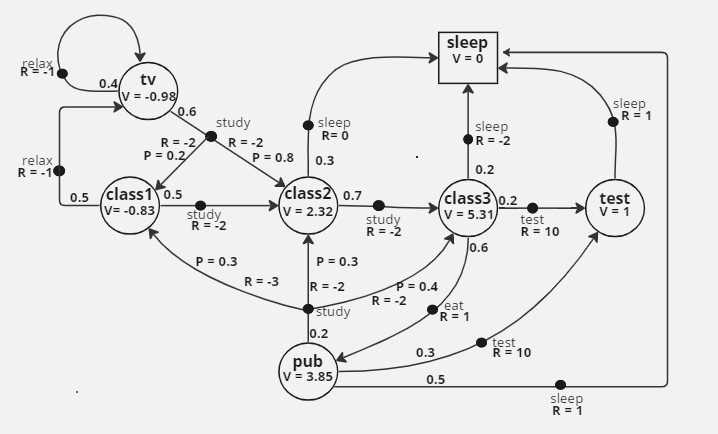

With the availability of the model of the environment (transition probabilities), we're able to evaluate our policy (stachastic policy) which is nothing but to compute the value of the states.